In [1]:
import hvplot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)


In [3]:
df = pd.read_csv("/Users/nafeesahussain/Desktop/FlipRobo_Internship/documents/First phase evaluation project/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [6]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

In [7]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

### Categorical Features

In [8]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender : ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representativ

In [9]:
len(object_col)

7

In [10]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

### Numerical Features

In [11]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [12]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


### Data Visualization

In [13]:
df.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (DistanceFromHome_count)

In [14]:
df.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [Education]   (Education_count)

In [15]:
df.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [RelationshipSatisfaction]   (RelationshipSatisfaction_count)

In [16]:
df.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (EnvironmentSatisfaction_count)

In [17]:
df.hvplot.hist(y='JobInvolvement', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobInvolvement]   (JobInvolvement_count)

In [18]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (JobLevel_count)

In [19]:
df.hvplot.hist(y='JobSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (JobSatisfaction_count)

In [20]:
df.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (NumCompaniesWorked_count)

In [21]:

df.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (PercentSalaryHike_count)

In [22]:
df.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [StockOptionLevel]   (StockOptionLevel_count)

In [23]:
df.hvplot.hist(y='TrainingTimesLastYear', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [TrainingTimesLastYear]   (TrainingTimesLastYear_count)

In [24]:
df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [Age]   (Age_count)

In [25]:
df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (MonthlyIncome_count)

In [26]:
df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (YearsAtCompany_count)

In [27]:
df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (TotalWorkingYears_count)

### Conclusion

The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.
BusinessTravel : The workers who travel alot are more likely to quit then other employees.

Department : The worker in Research & Development are more likely to stay then the workers on other departement.
EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

OverTime : The workers who work more hours are likely to quit then others.

### Data Preprocessing

In [33]:
hr_df = pd.read_csv("/Users/nafeesahussain/Desktop/FlipRobo_Internship/documents/First phase evaluation project/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [34]:
hr_df1 = hr_df.select_dtypes('object')
hr_df1

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [35]:
# Storing the int data type column in new Dataframe as hr_df2
hr_df2 = hr_df.select_dtypes('int64')
hr_df2

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


In [36]:
hr_df1.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [37]:
# checking the Statistical summary of the int type of Data in Dataframe:hr_df2
hr_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.00,36.92,9.14,18.00,30.00,36.00,43.00,60.00
DailyRate,1470.00,802.49,403.51,102.00,465.00,802.00,1157.00,1499.00
DistanceFromHome,1470.00,9.19,8.11,1.00,2.00,7.00,14.00,29.00
Education,1470.00,2.91,1.02,1.00,2.00,3.00,4.00,5.00
EmployeeCount,1470.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,1470.00,1024.87,602.02,1.00,491.25,1020.50,1555.75,2068.00
EnvironmentSatisfaction,1470.00,2.72,1.09,1.00,2.00,3.00,4.00,4.00
HourlyRate,1470.00,65.89,20.33,30.00,48.00,66.00,83.75,100.00
JobInvolvement,1470.00,2.73,0.71,1.00,2.00,3.00,3.00,4.00
JobLevel,1470.00,2.06,1.11,1.00,1.00,2.00,3.00,5.00


In [38]:
# checking the Statistical Summary of dataframe: hr_df
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.00,36.92,9.14,18.00,30.00,36.00,43.00,60.00
DailyRate,1470.00,802.49,403.51,102.00,465.00,802.00,1157.00,1499.00
DistanceFromHome,1470.00,9.19,8.11,1.00,2.00,7.00,14.00,29.00
Education,1470.00,2.91,1.02,1.00,2.00,3.00,4.00,5.00
EmployeeCount,1470.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,1470.00,1024.87,602.02,1.00,491.25,1020.50,1555.75,2068.00
EnvironmentSatisfaction,1470.00,2.72,1.09,1.00,2.00,3.00,4.00,4.00
HourlyRate,1470.00,65.89,20.33,30.00,48.00,66.00,83.75,100.00
JobInvolvement,1470.00,2.73,0.71,1.00,2.00,3.00,3.00,4.00
JobLevel,1470.00,2.06,1.11,1.00,1.00,2.00,3.00,5.00


### Cleaning Data

In [39]:
# checking is there any null value in the dataframe: hr_df
hr_df.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [40]:
# checking the sum of null values in dataframe : hr_df
hr_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [41]:
# Checking the Duplicate Value in the Dataframe:hr_df
have_duplicated_row = hr_df.duplicated().any()
have_duplicated_row

False

#### Some of columns can be removed, because their values do not affect the analysis results.

In [42]:
hr_df = hr_df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

### EDA

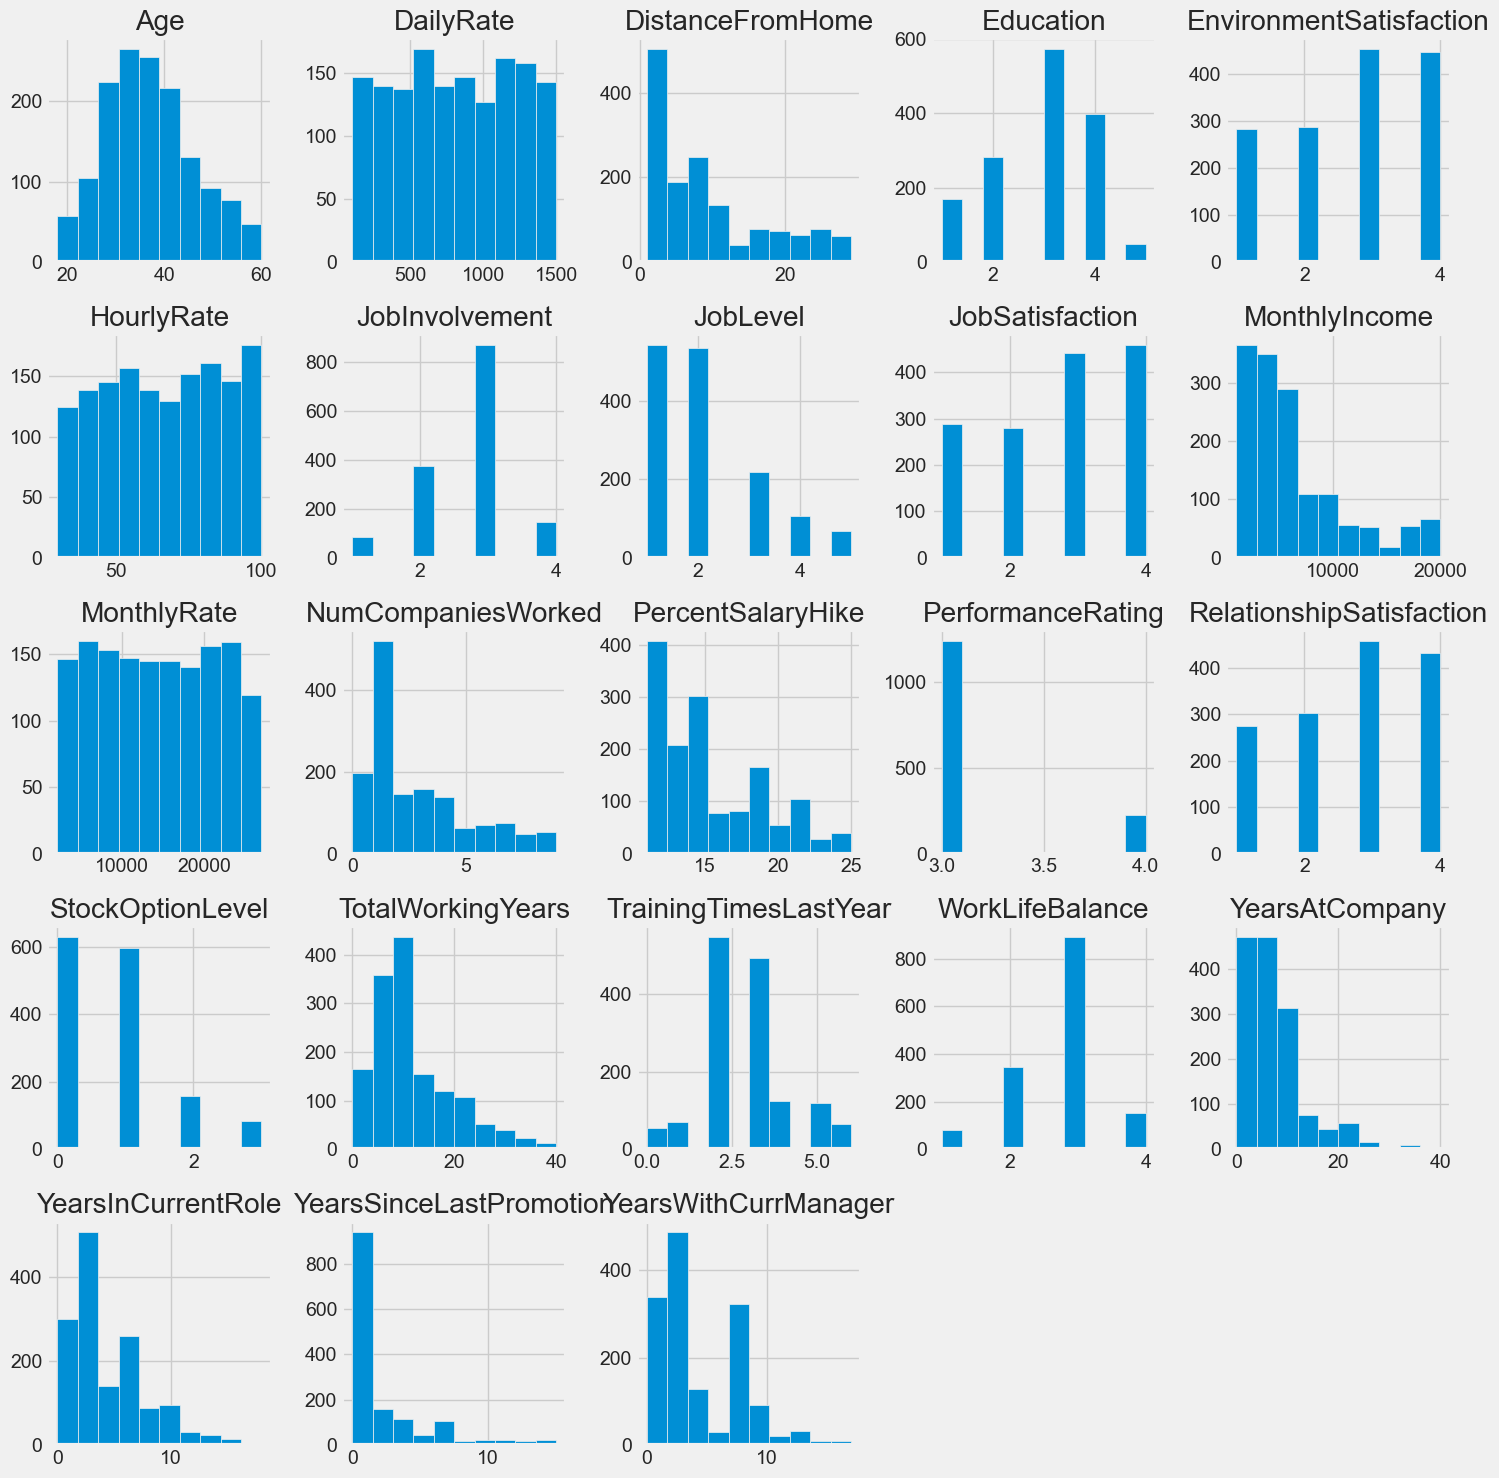

In [43]:
# Create a histogram of all columns in the DataFrame
hr_df.hist(figsize=(15, 15))

# Tighten the layout of the plot
plt.tight_layout()

# Show the plot
plt.show()

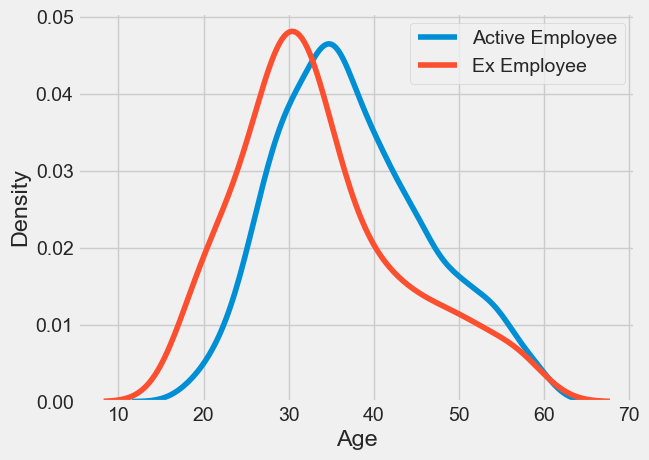

In [44]:
# Create a kernel density plot of the Age column for active and ex-employees
sns.kdeplot(
    hr_df.loc[hr_df['Attrition'] == 'No', 'Age'],
    label='Active Employee'
)
sns.kdeplot(
    hr_df.loc[hr_df['Attrition'] == 'Yes', 'Age'],
    label='Ex Employee'
)

# Add a legend and show the plot
plt.legend()
plt.show()

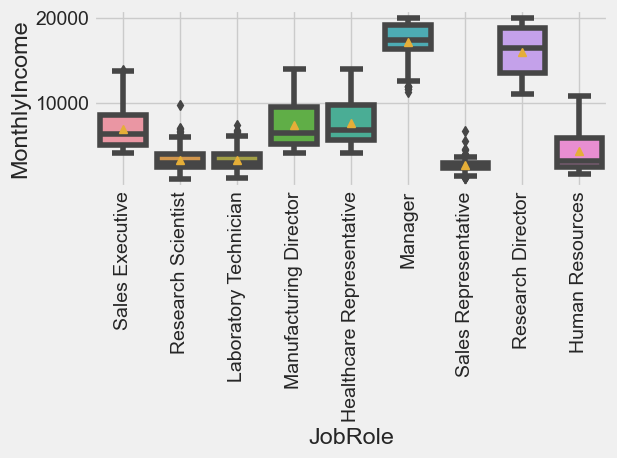

In [45]:
# Create a boxplot of MonthlyIncome by JobRole
ax = sns.boxplot(
    y="MonthlyIncome",
    x="JobRole",
    showmeans=True,
    data=hr_df
)

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=90)

# Add a grid to the plot
plt.grid(True, alpha=1)

# Tighten the layout of the plot
plt.tight_layout()

# Display the plot
plt.show()

In [46]:
# Get the categorical and numerical columns
categorical_columns = hr_df.select_dtypes(['object']).columns
numerical_columns = hr_df.select_dtypes(['number']).columns

# Print the categorical and numerical columns
print(categorical_columns)
print(numerical_columns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


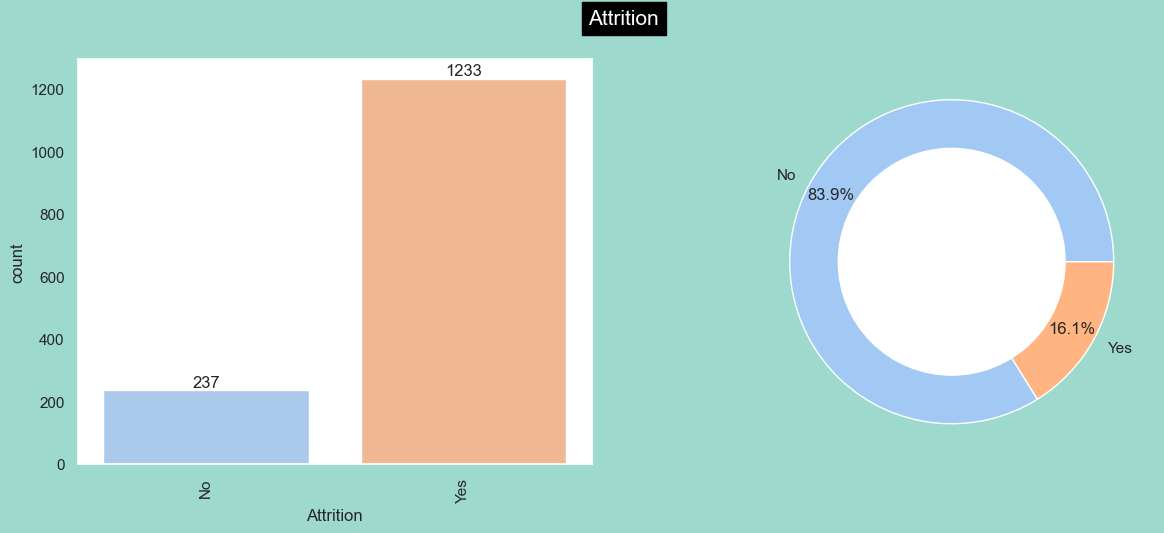

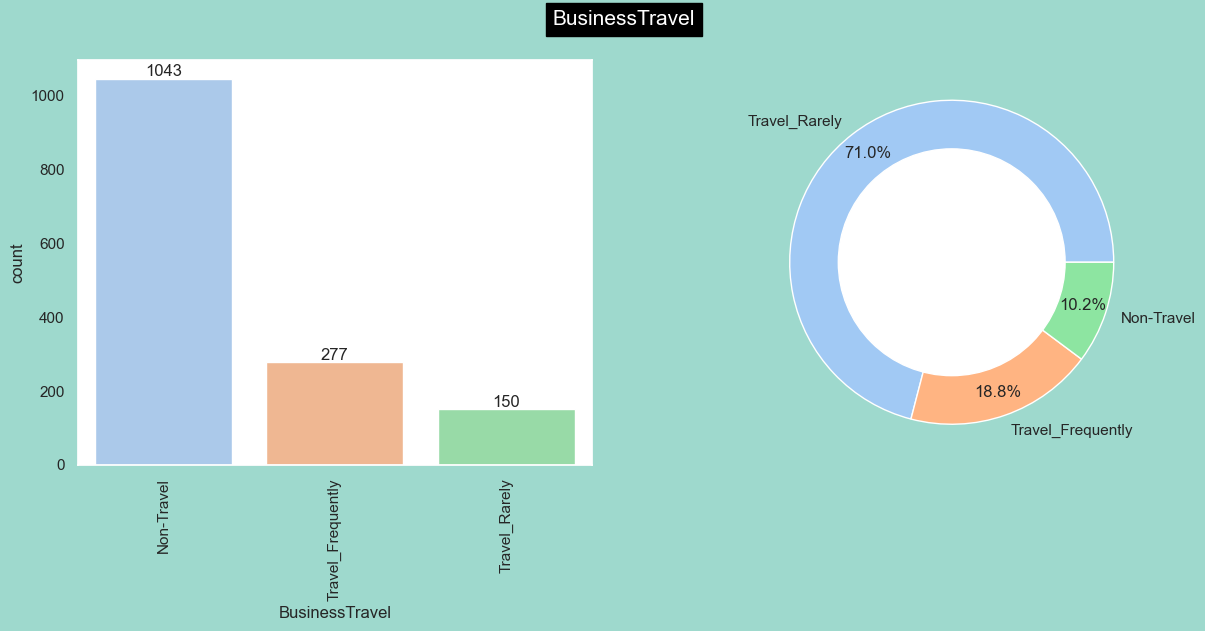

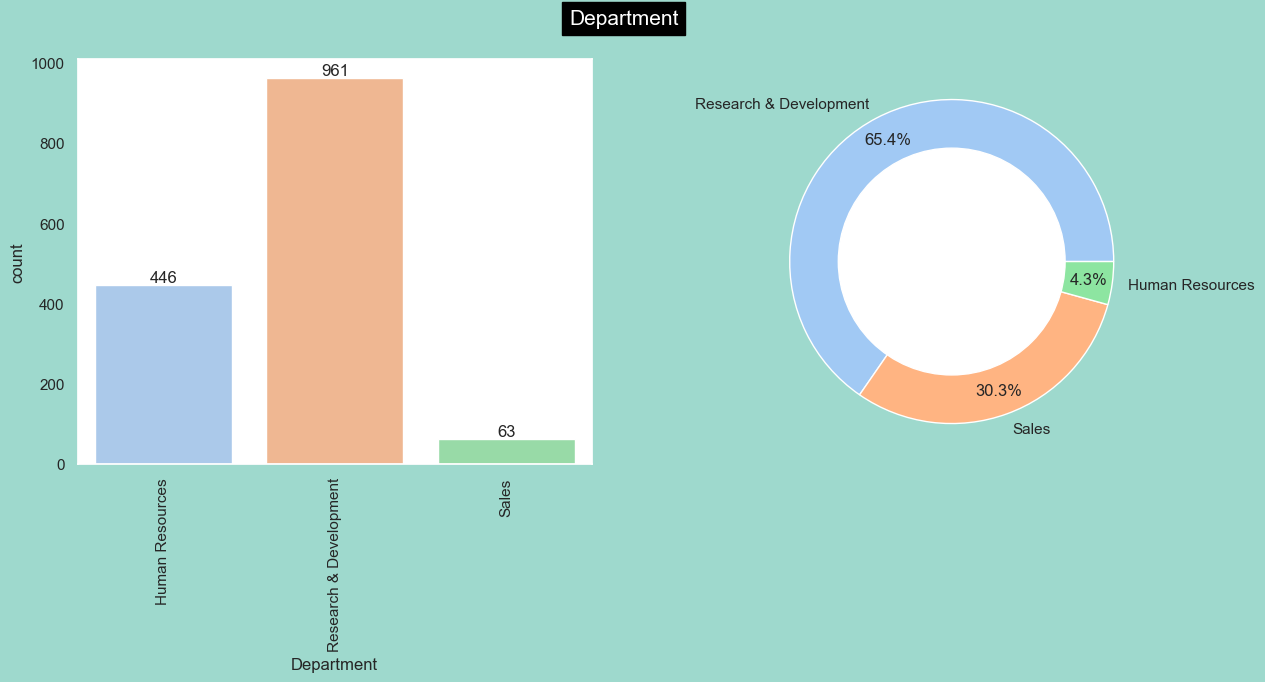

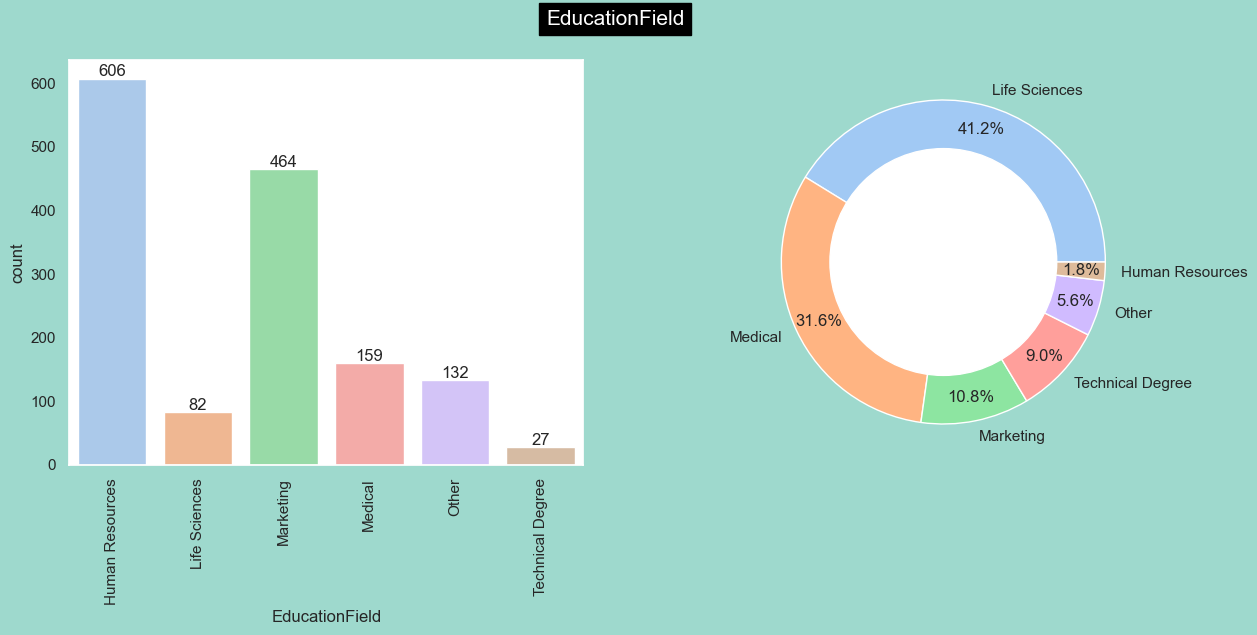

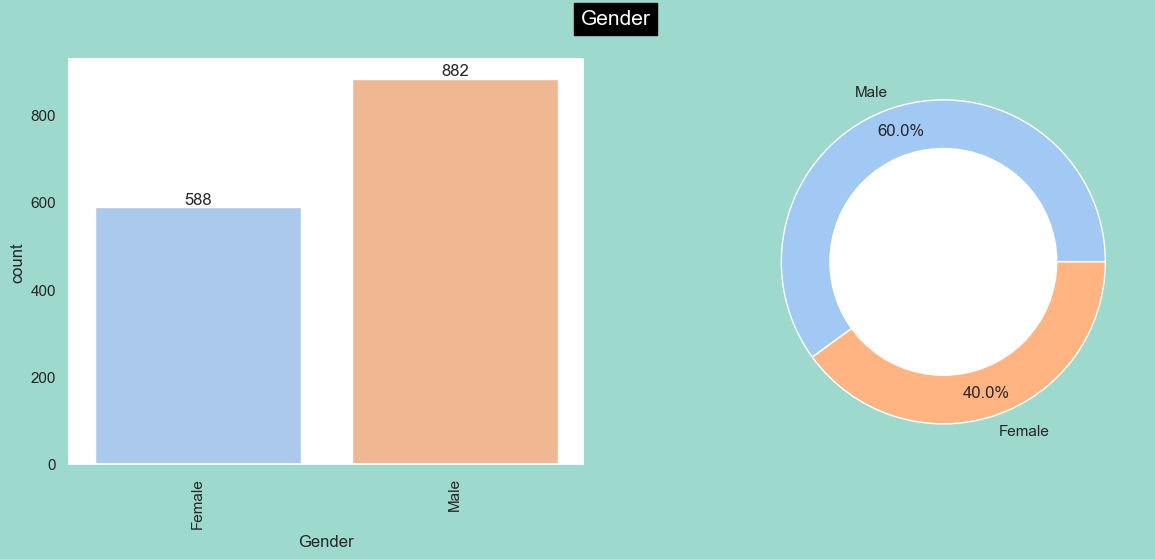

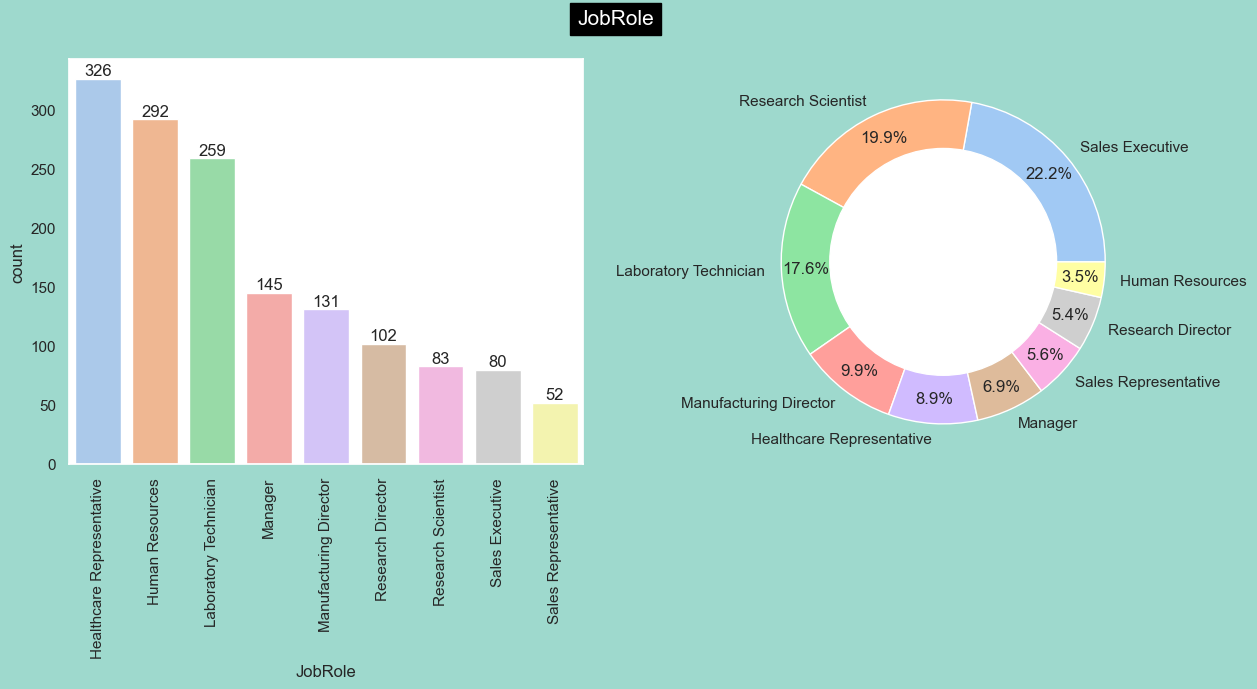

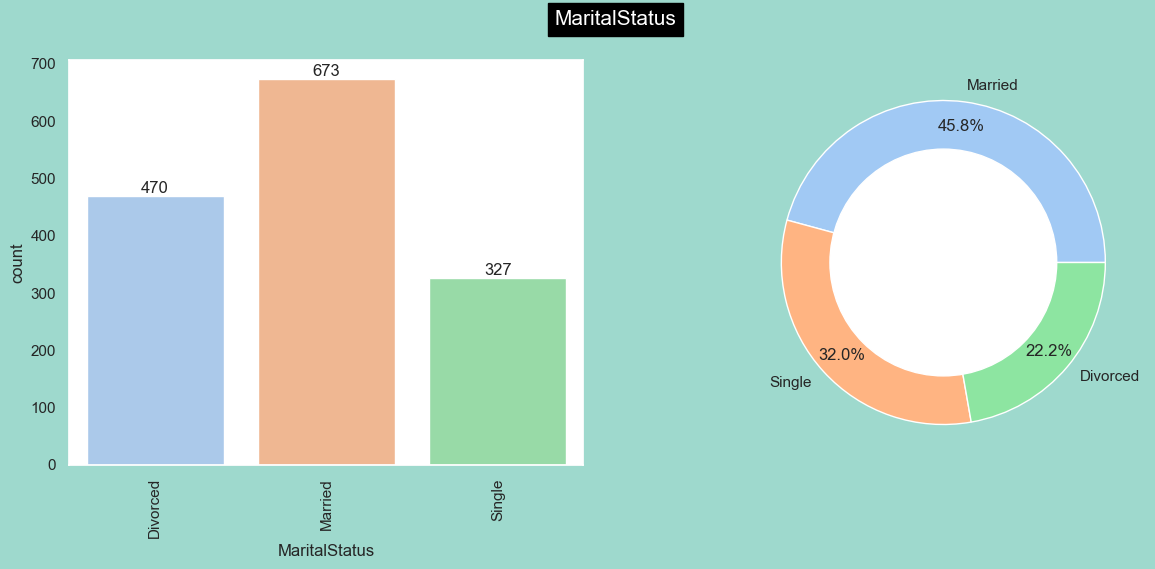

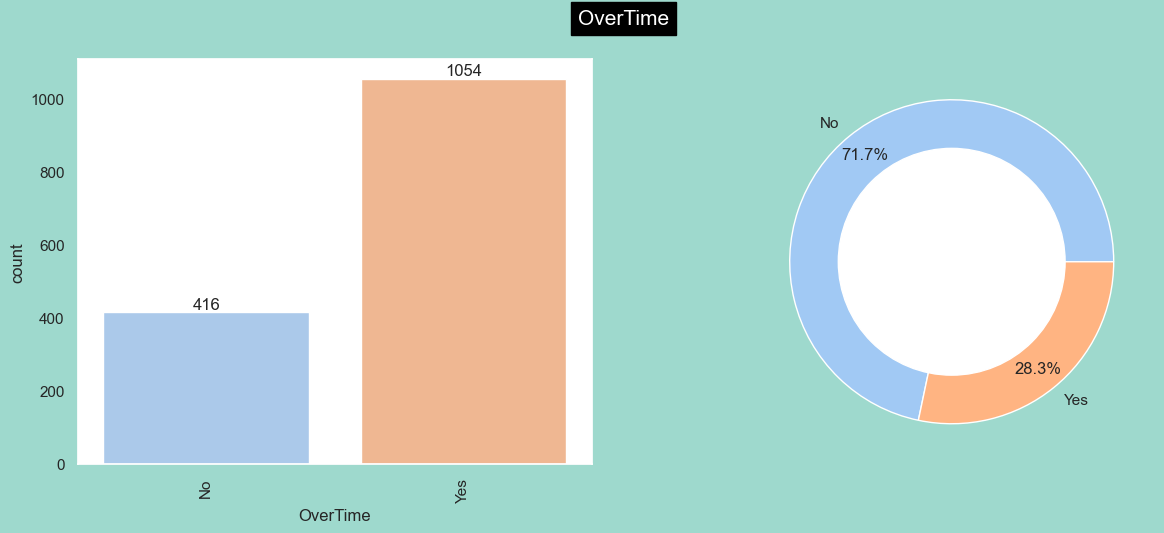

In [48]:
# Set the background color of plots to white and the figure color to #9ed9cd
sns.set(rc={'axes.facecolor': 'White', 'figure.facecolor': '#9ed9cd'})
sns.set_palette('pastel')

# Iterate over the categorical columns
for i, col in enumerate(categorical_columns):
    # Create a figure and two axes
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))

    # Create a countplot of the categorical column in the first axis
    ax = sns.countplot(data=hr_df, x=col, ax=axes[0])

    # Rotate the x-axis labels to prevent overlapping
    activities = [var for var in hr_df[col].value_counts().sort_index().index]
    ax.set_xticklabels(activities, rotation=90)

    # Add bar labels to the countplot
    for container in axes[0].containers:
        axes[0].bar_label(container)

    # Get the pie chart labels and sizes
    index = hr_df[col].value_counts().index
    size = hr_df[col].value_counts().values
        # Create the pie chart
    axes[1].pie(
        size,
        labels=index,
        autopct='%1.1f%%',
        pctdistance=0.85,
        colors=sns.color_palette('pastel'),
    )

    # Add a white inner circle to the pie chart
    centre_circle = plt.Circle((0, 0), 0.70, fc='White')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Add a suptitle to the figure
    plt.suptitle(col, backgroundcolor='Black', color='white', fontsize=15)

    # Show the plot
    plt.show()

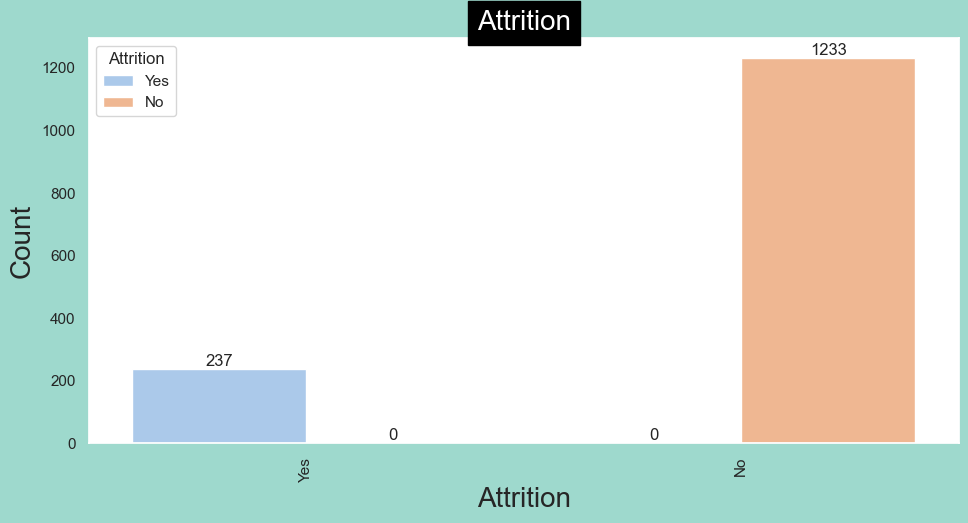

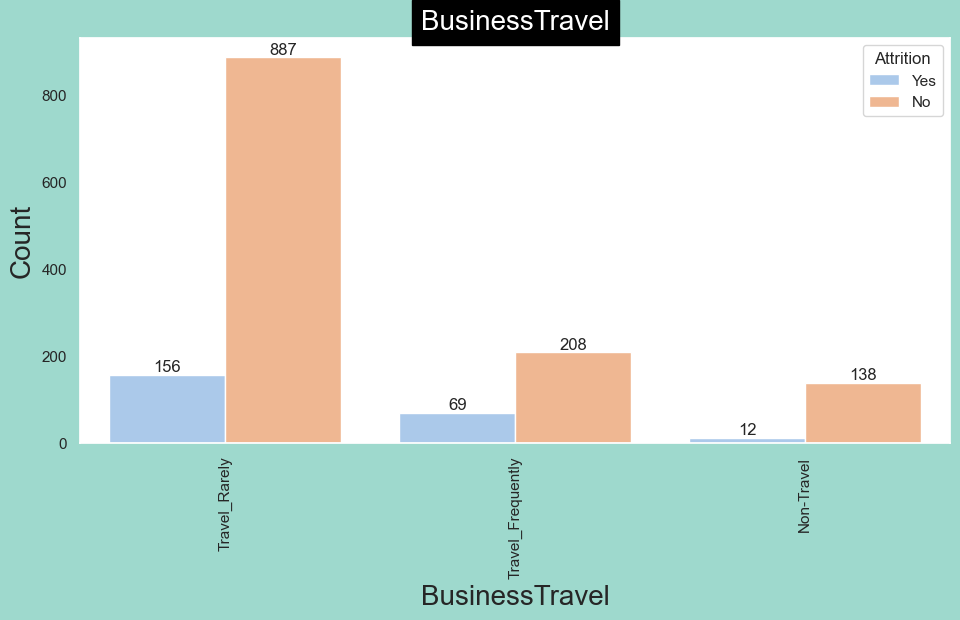

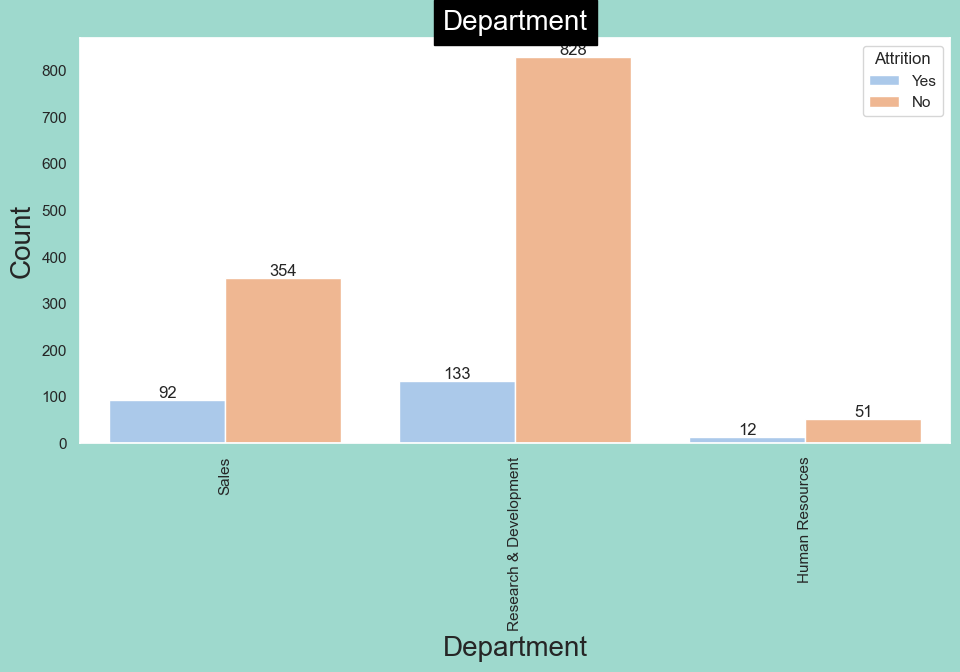

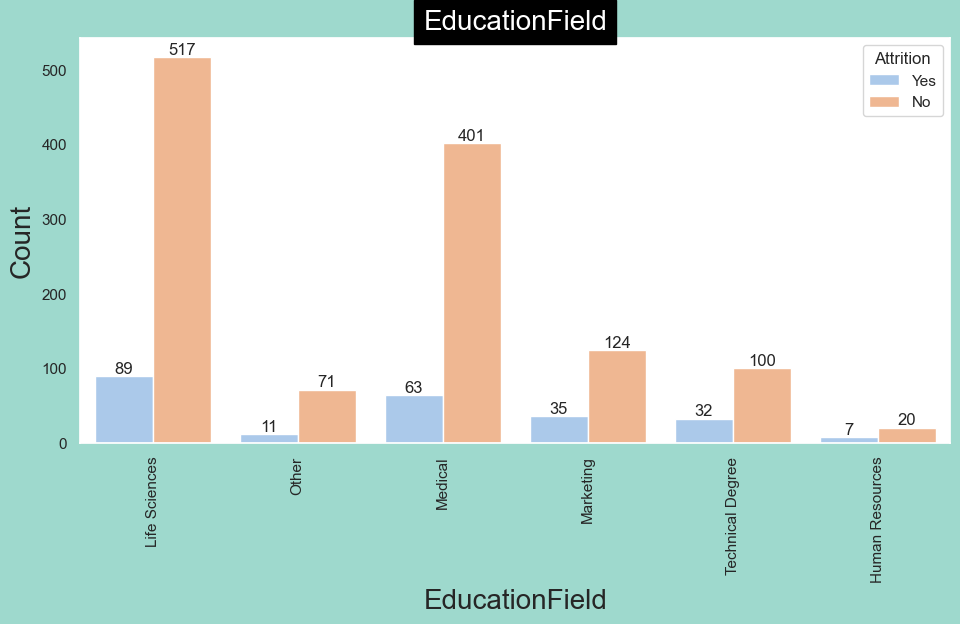

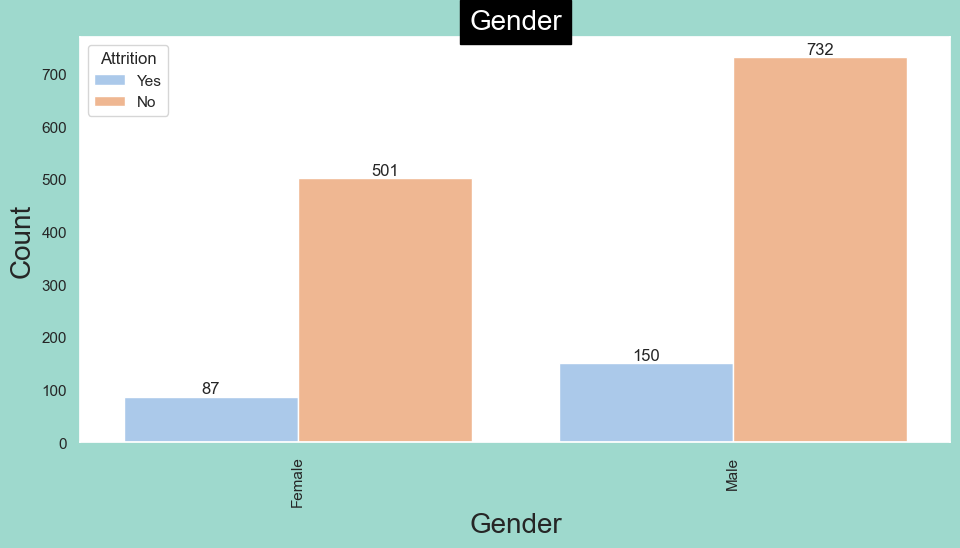

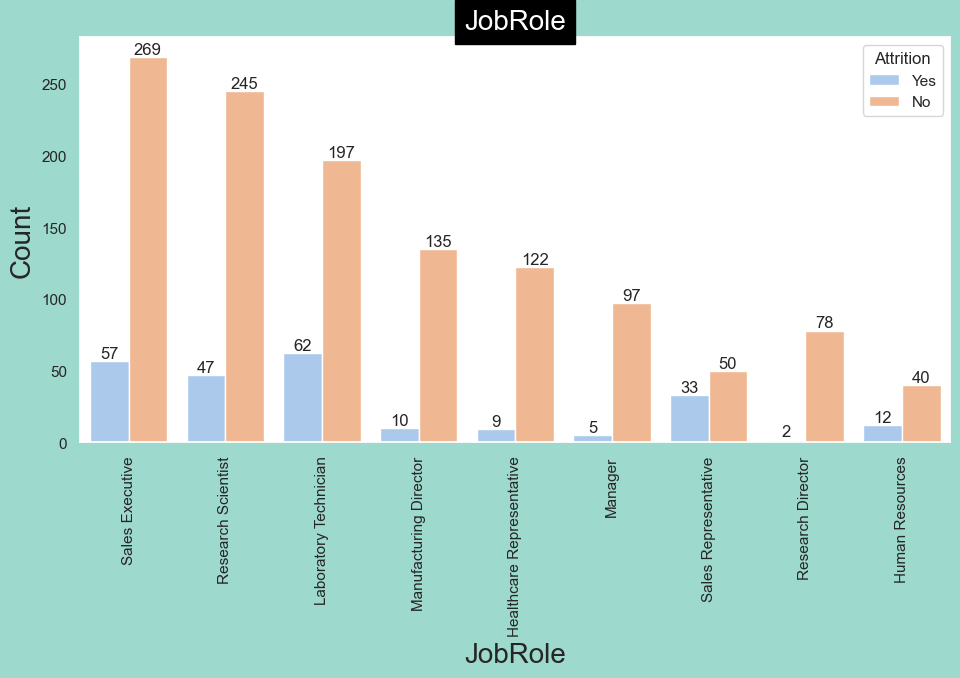

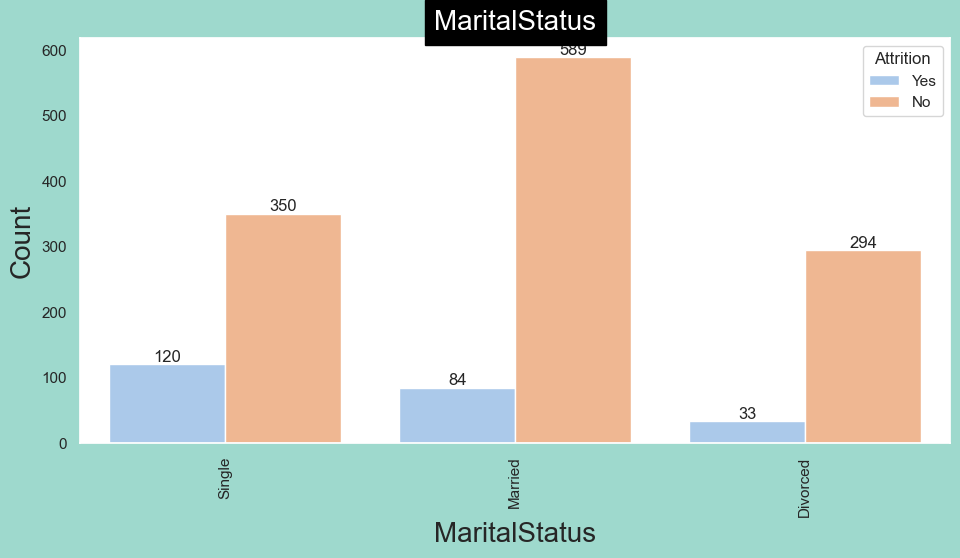

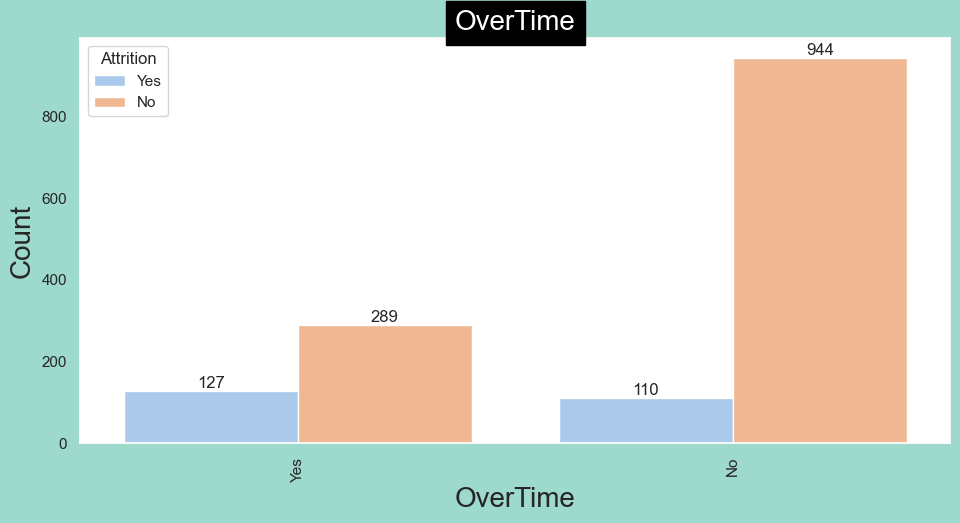

In [49]:

# Iterate over the categorical columns
for col in categorical_columns:
    # Create a figure
    fig = plt.figure(figsize=(10, 5))

    # Create a countplot of the categorical column with Attrition as the hue
    ax = sns.countplot(x=hr_df[col], data=hr_df, hue='Attrition')

    # Add bar labels to the countplot
    for container in ax.containers:
        ax.bar_label(container)

    # Set the title, labels, and grid
    plt.title(col, backgroundcolor='black', color='white', fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.grid(True)

    # Show the plot
    plt.show()

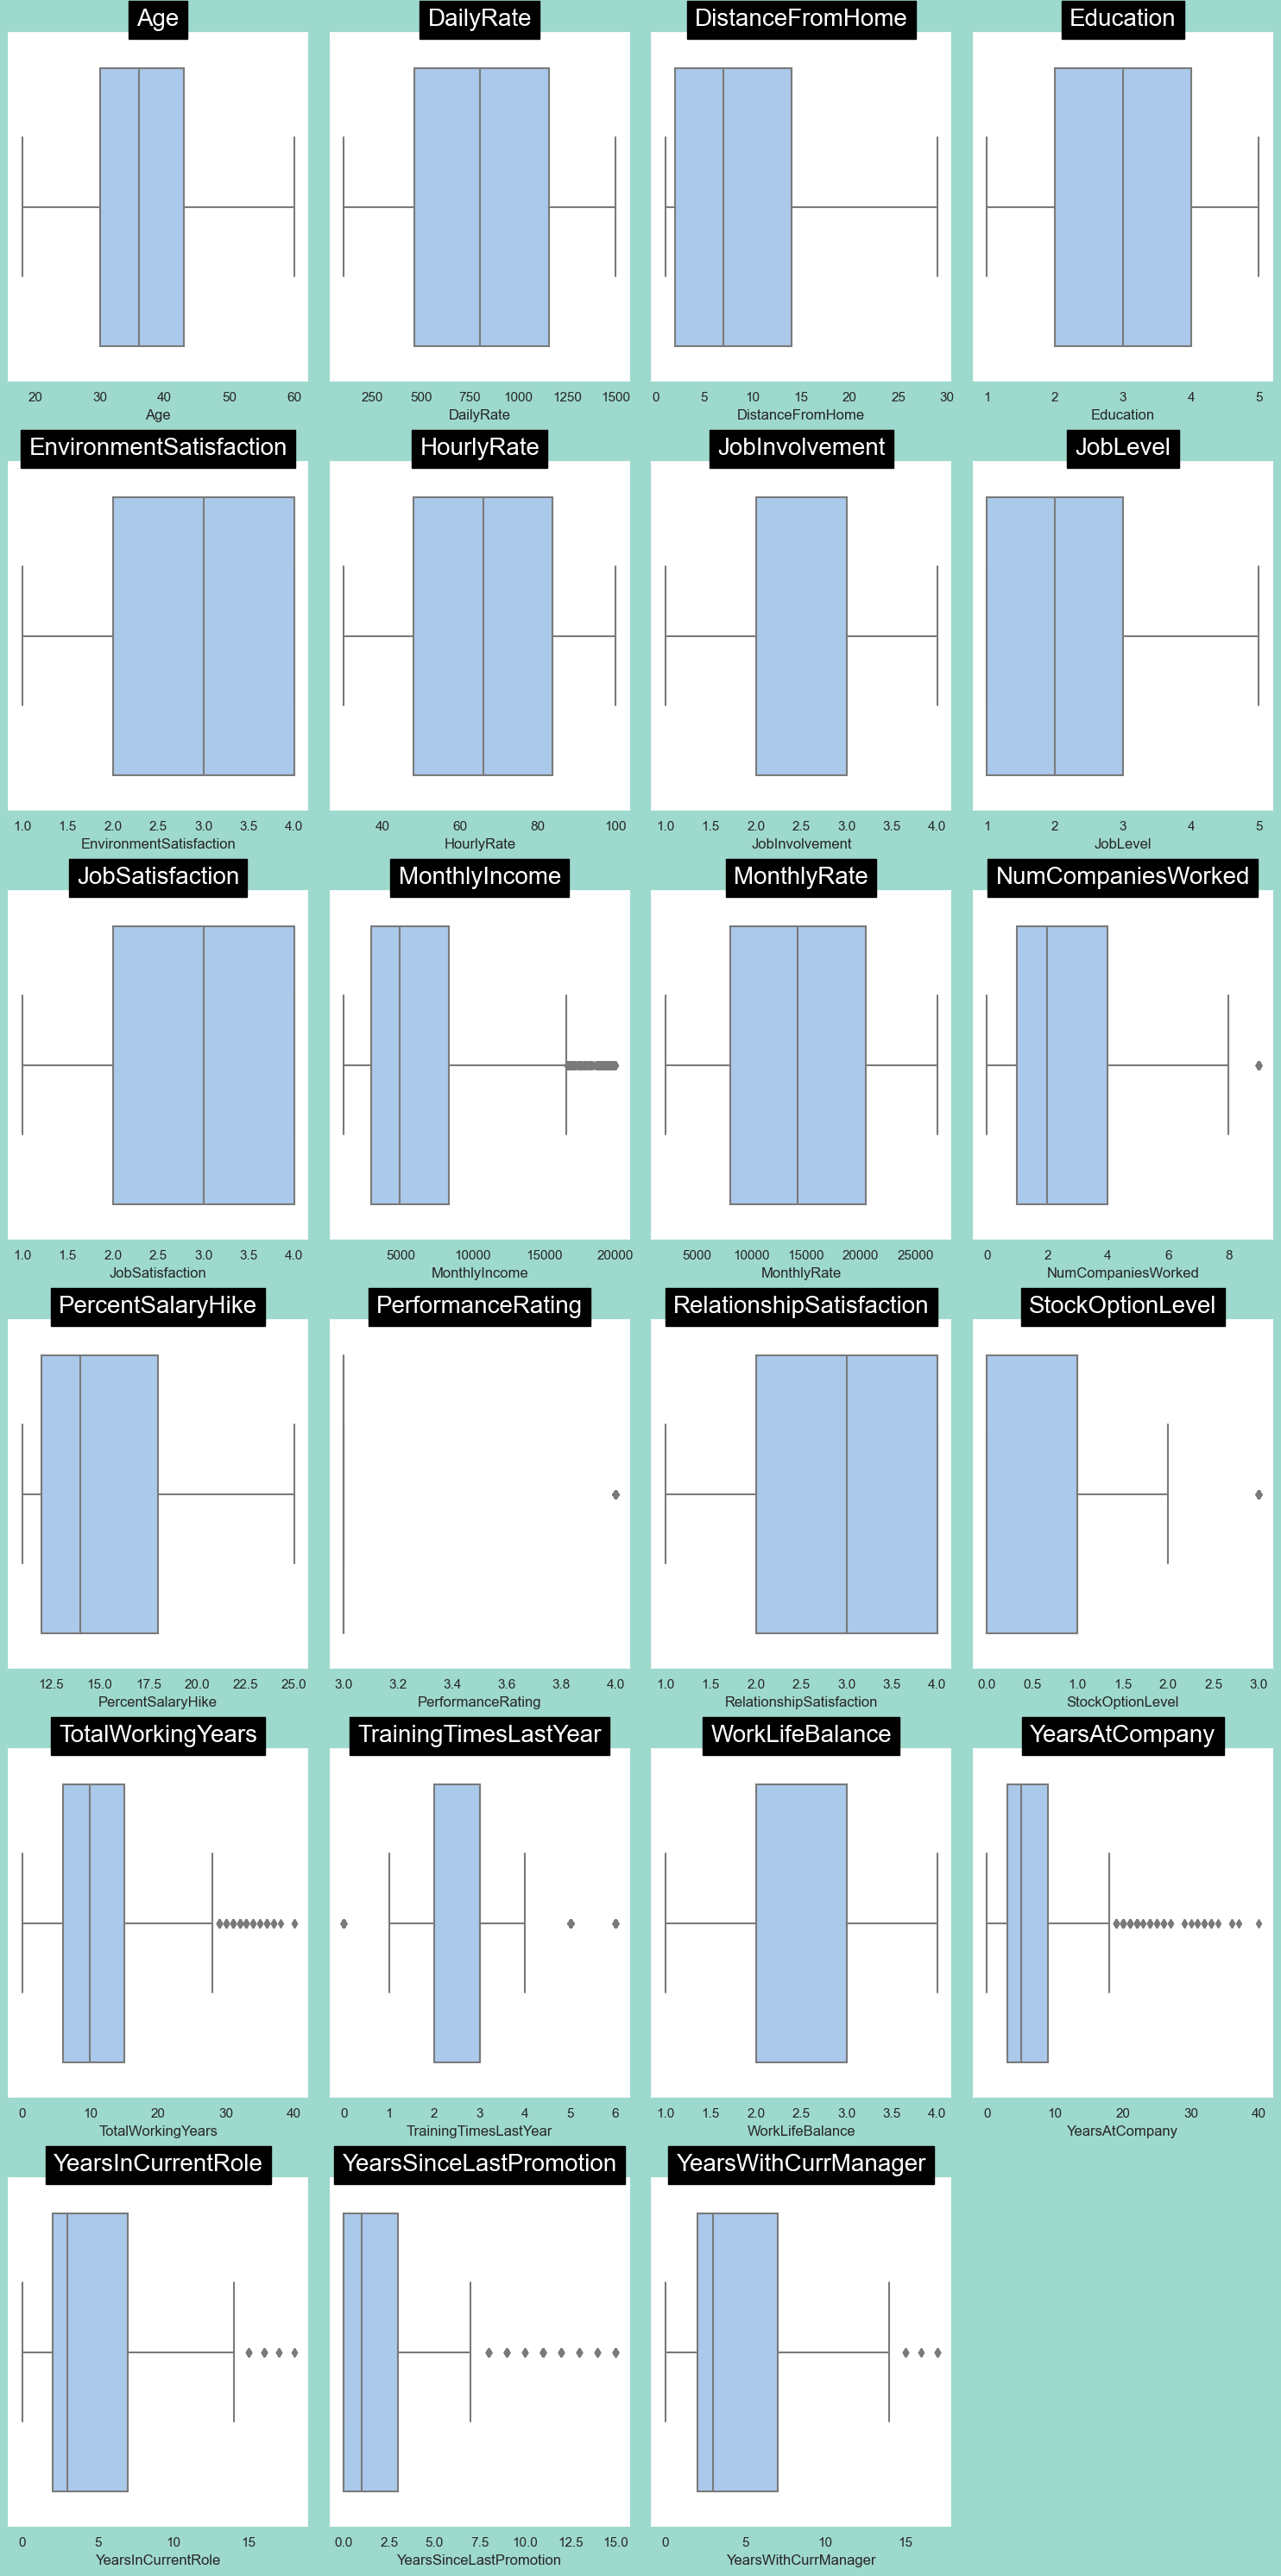

In [50]:
# Create a figure
fig = plt.figure(figsize=(15, 30))

# Iterate over the numerical columns
for idx, i in enumerate(numerical_columns):
    # Create a subplot
    ax = fig.add_subplot(6, 4, idx + 1)

    # Create a boxplot of the numerical column
    sns.boxplot(x=i, data=hr_df, ax=ax)

    # Set the title, label, and grid
    ax.set_title(i, backgroundcolor='black', color='white', fontsize=20)
    ax.set_xlabel(i, fontsize=12)
    ax.grid(True)

# Tighten the layout of the figure
plt.tight_layout()

# Show the plot
plt.show()

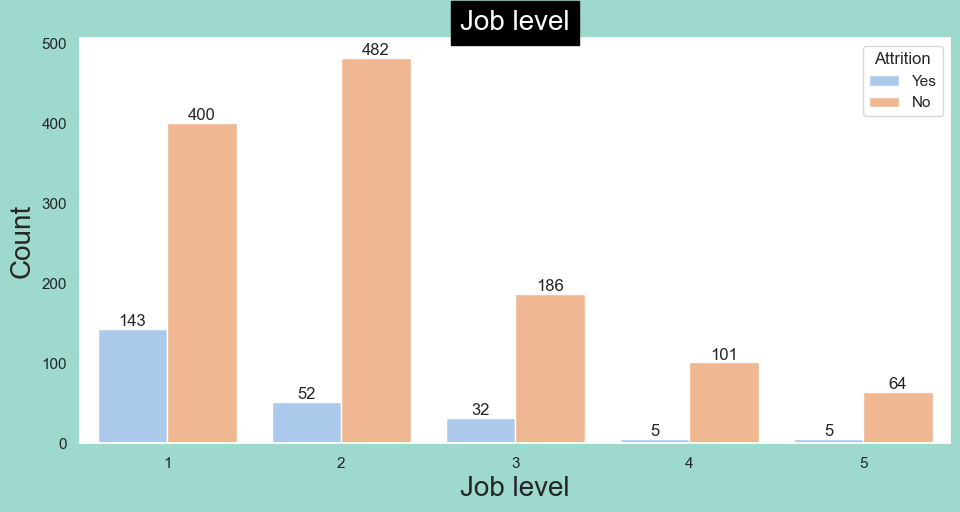

In [51]:
fig = plt.figure(figsize=(10, 5))

# Create a countplot of the JobLevel column with Attrition as the hue
ax = sns.countplot(x="JobLevel", data=hr_df, hue="Attrition")

# Add bar labels to the countplot
for container in ax.containers:
    ax.bar_label(container)

# Set the title, labels, and grid
plt.title("Job level", backgroundcolor='black', color='white', fontsize=20)
plt.xlabel("Job level", fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid(True)

# Show the plot
plt.show()

<Figure size 500x1000 with 0 Axes>

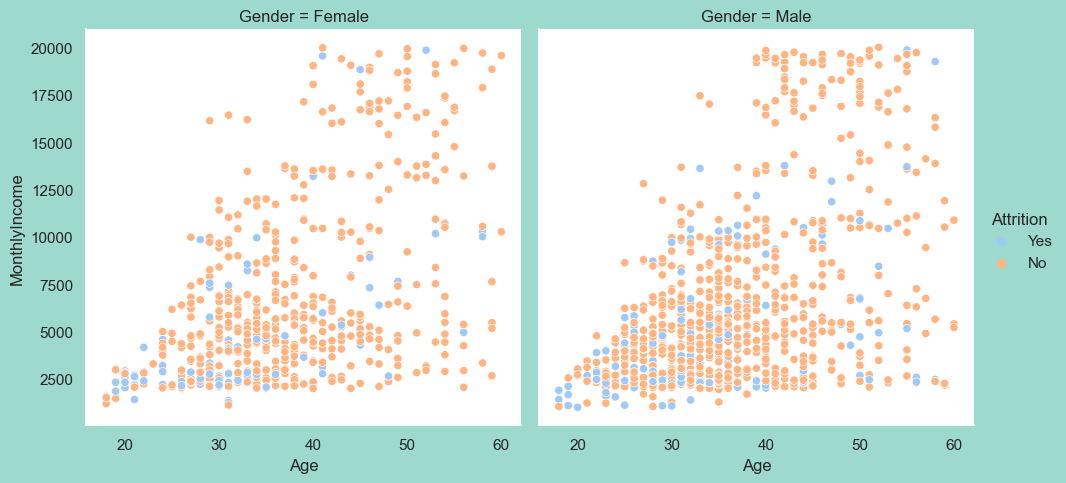

In [52]:
fig = plt.figure(figsize=(5, 10))

# Create a relational plot of MonthlyIncome vs. Age, colored by Attrition and split by Gender
sns.relplot(
    data=hr_df,
    y="MonthlyIncome",
    x="Age",
    hue="Attrition",
    col="Gender",
    kind="scatter",
    col_wrap=2,
)

# Show the plot
plt.show()


<Figure size 500x1000 with 0 Axes>

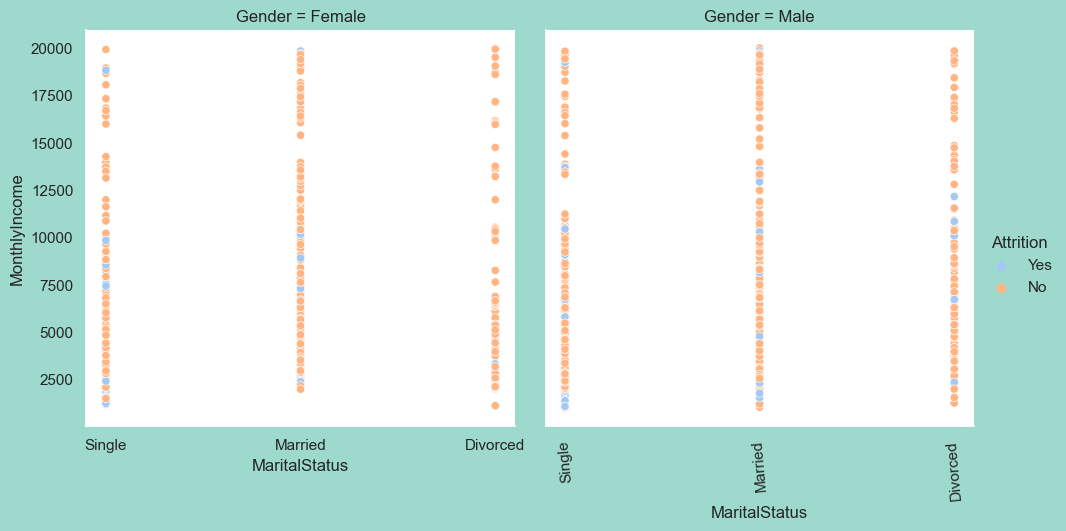

<Figure size 500x1000 with 0 Axes>

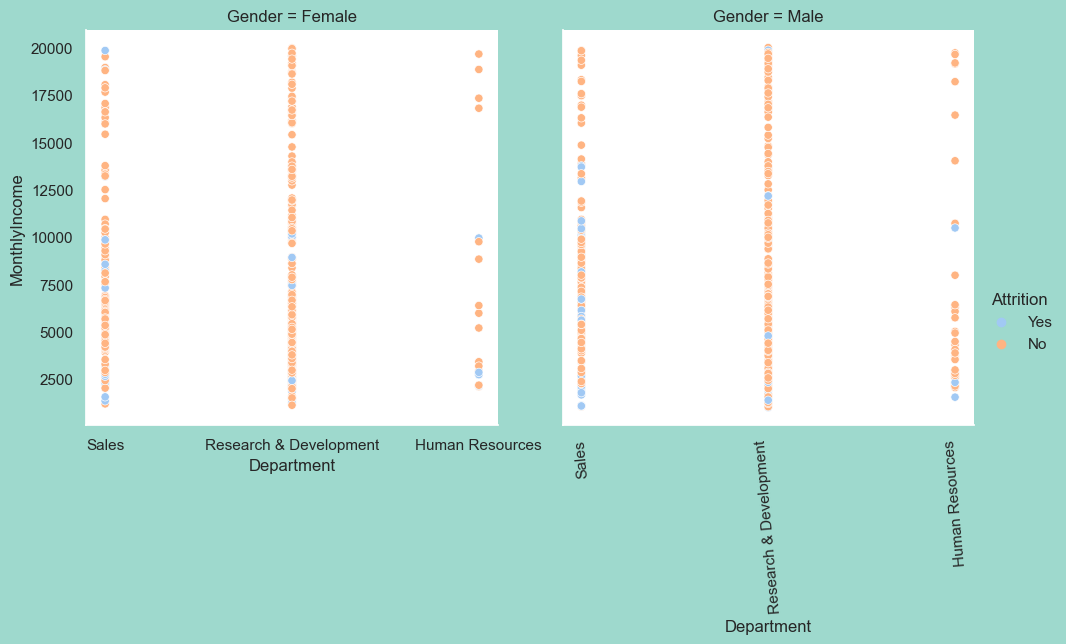

<Figure size 500x1000 with 0 Axes>

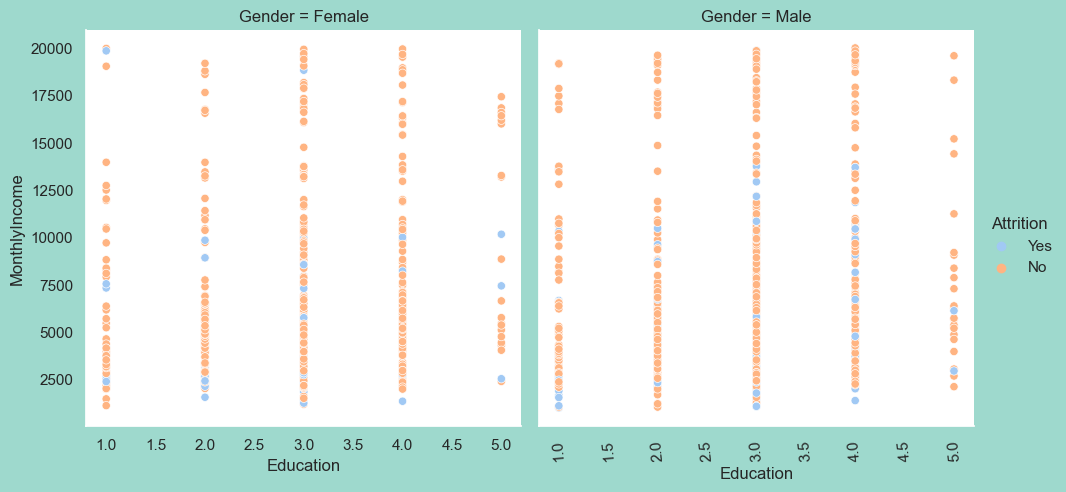

<Figure size 500x1000 with 0 Axes>

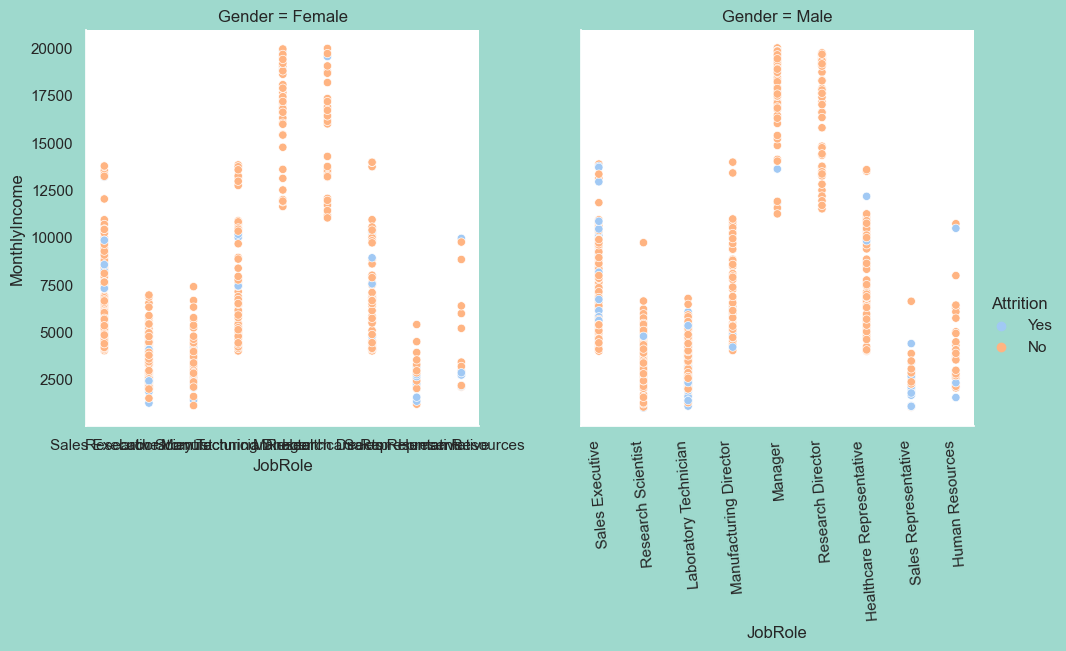

<Figure size 500x1000 with 0 Axes>

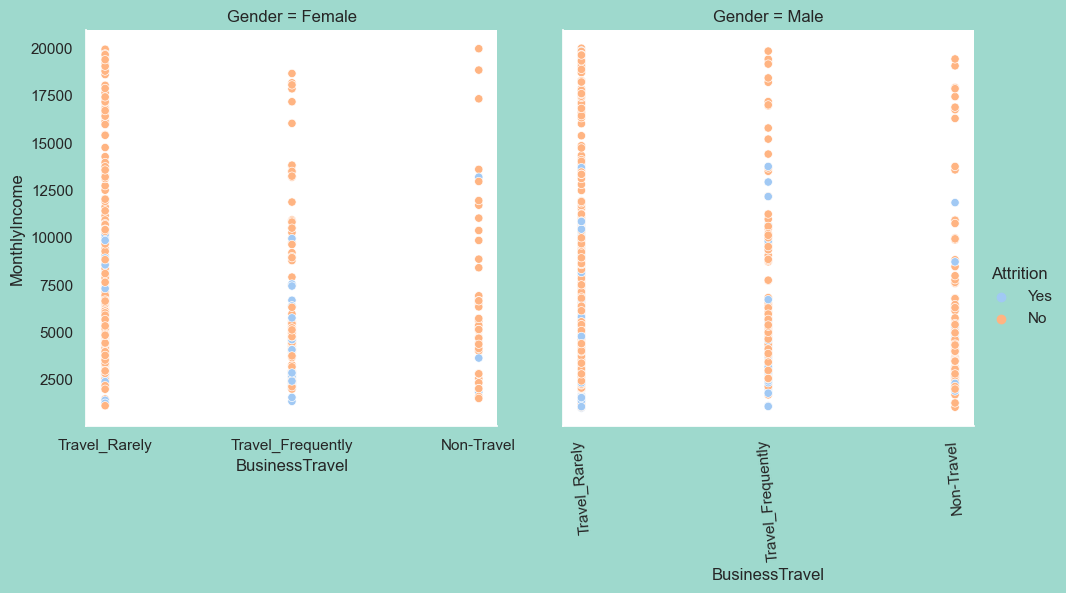

In [53]:
# Create a list of variables to plot
variables = ["MaritalStatus", "Department", "Education", "JobRole", "BusinessTravel"]

# Iterate over the variables and create a relational plot for each one
for variable in variables:
    fig = plt.figure(figsize=(5, 10))

    sns.relplot(
        data=hr_df,
        y="MonthlyIncome",
        x=variable,
        hue="Attrition",
        col="Gender",
        kind="scatter",
        col_wrap=2,
    )

    # Rotate the x-axis labels for the JobRole plot
    if variable == "JobRole":
        rotation = 90
        for i, ax in enumerate(fig.axes):
            ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)

    plt.xticks(rotation=95)
    plt.yticks(rotation=95)

    plt.show()

### Analysis of graphs
Attrition is the highest for both men and women from 18 to 35 years of age and gradually decreases.

As income increases, attrition decreases.

Attrition is much, much less in divorced women.

Attrition is higher for employees who usually travel than others, and this rate is higher for women than for men.

Attrition is the highest for those in level 1 jobs.

Women with the job position of manager, research director and technician laboratory have almost no attrition.

Men with the position of sales expert have a lot of attrition.